In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1754,2020-09-25,United Kingdom,413193.0,416363.0,41921.0,41902.0,-3170.0,19.0
1755,2020-09-25,Germany,279605.0,280223.0,9443.0,9443.0,-618.0,0.0
1756,2020-09-25,Iran,435445.0,436319.0,25049.0,25015.0,-874.0,34.0
1757,2020-09-25,Turkey,309357.0,309790.0,7763.0,7785.0,-433.0,-22.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10977.94769755543
RMSE =  40007.25415313107


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  315.78112563956796
RMSE =  790.0549117004398


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  80386.00602409638
RMSE =  126447.0534681497
-- World performances for deaths --
MAE =  1874.7710843373493
RMSE =  2277.3107978226244


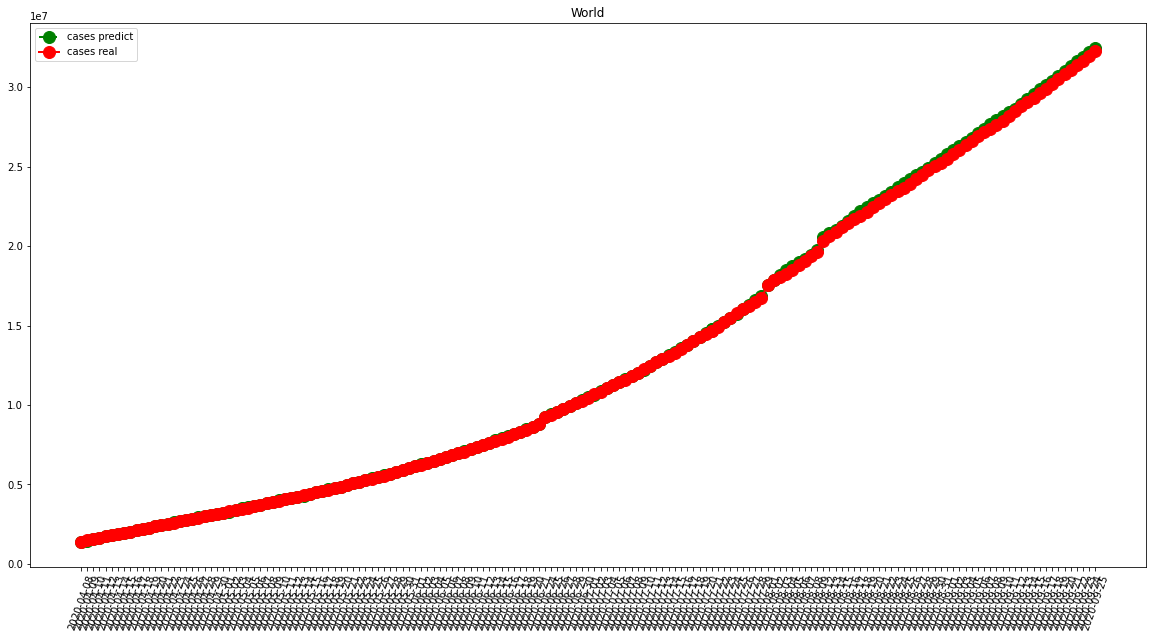

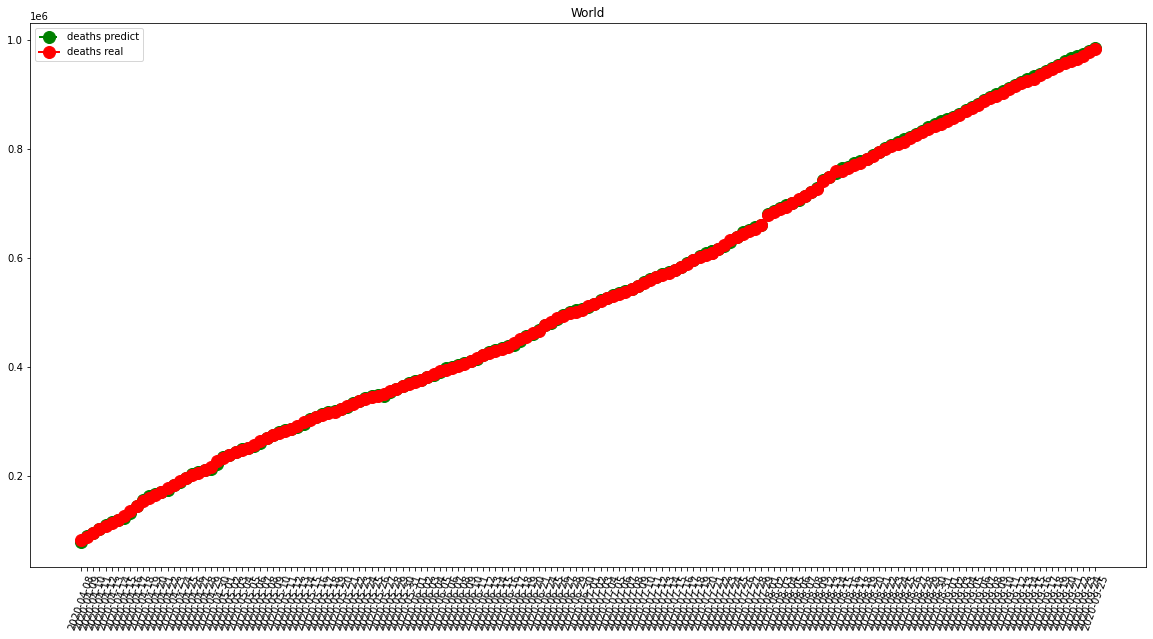

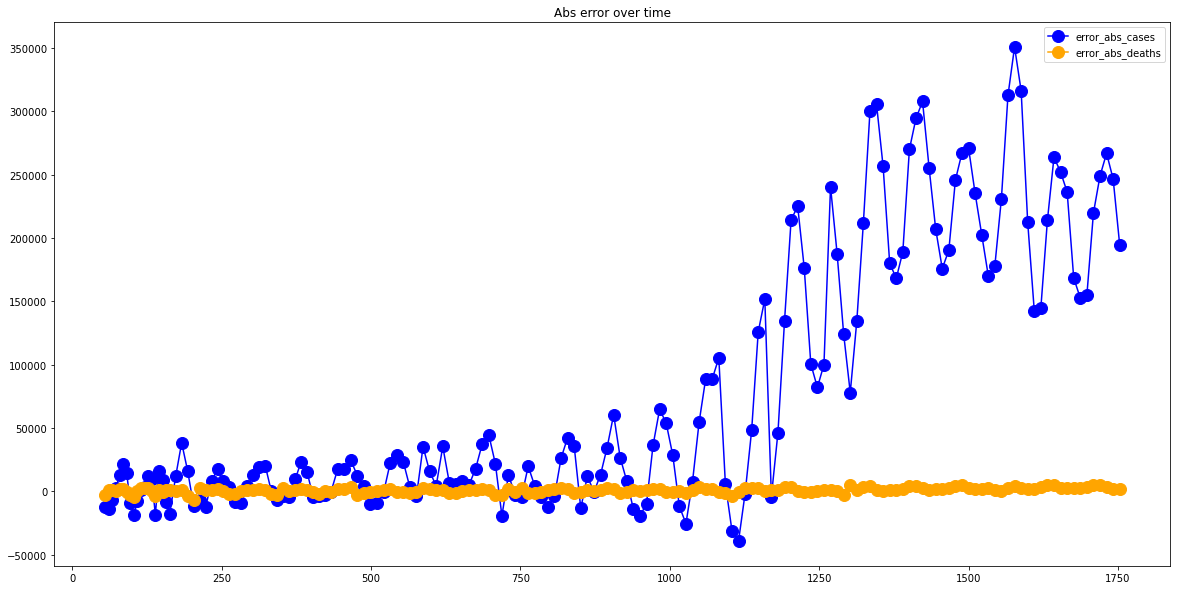

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1261.8352272727273
RMSE =  1949.3723509119545
-- France performances for deaths --
MAE =  110.05113636363636
RMSE =  253.32272580463624


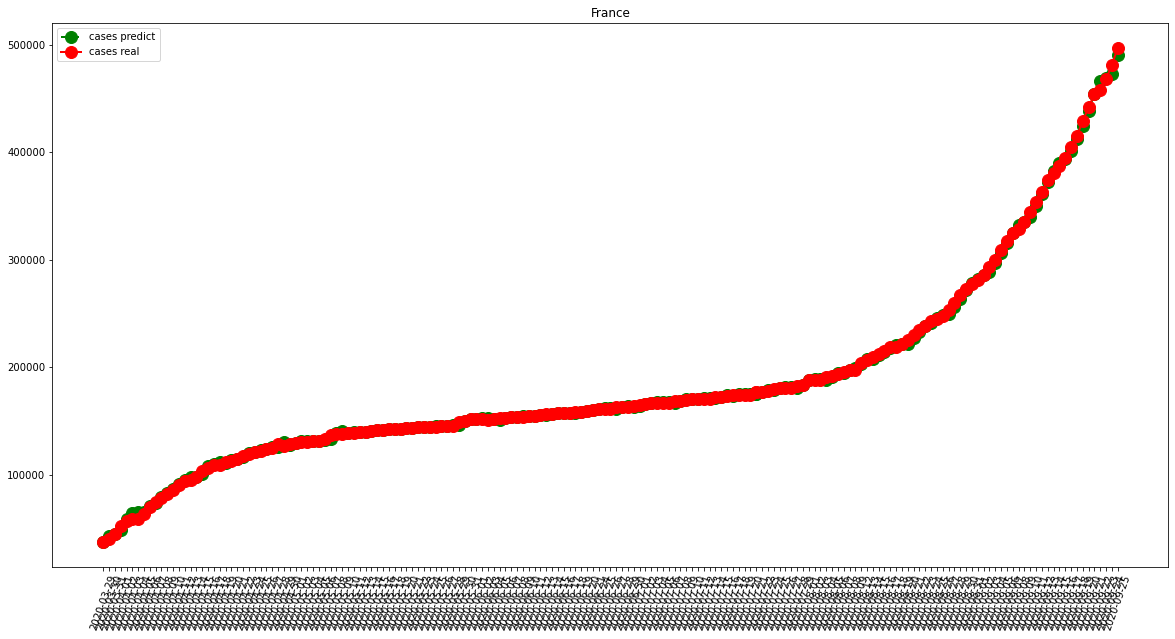

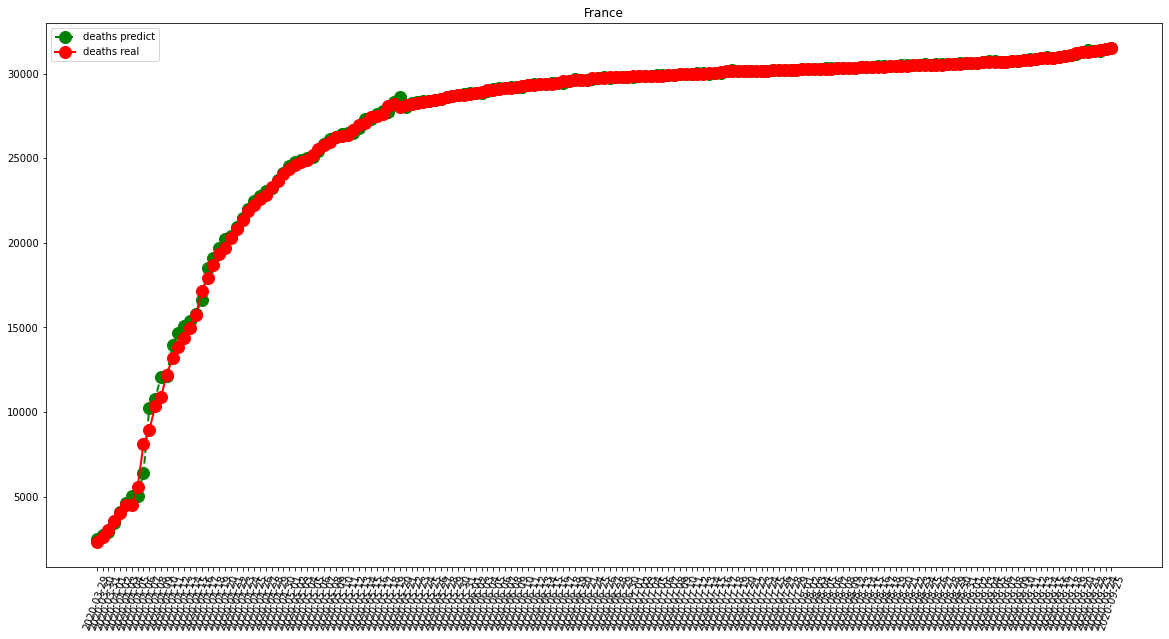

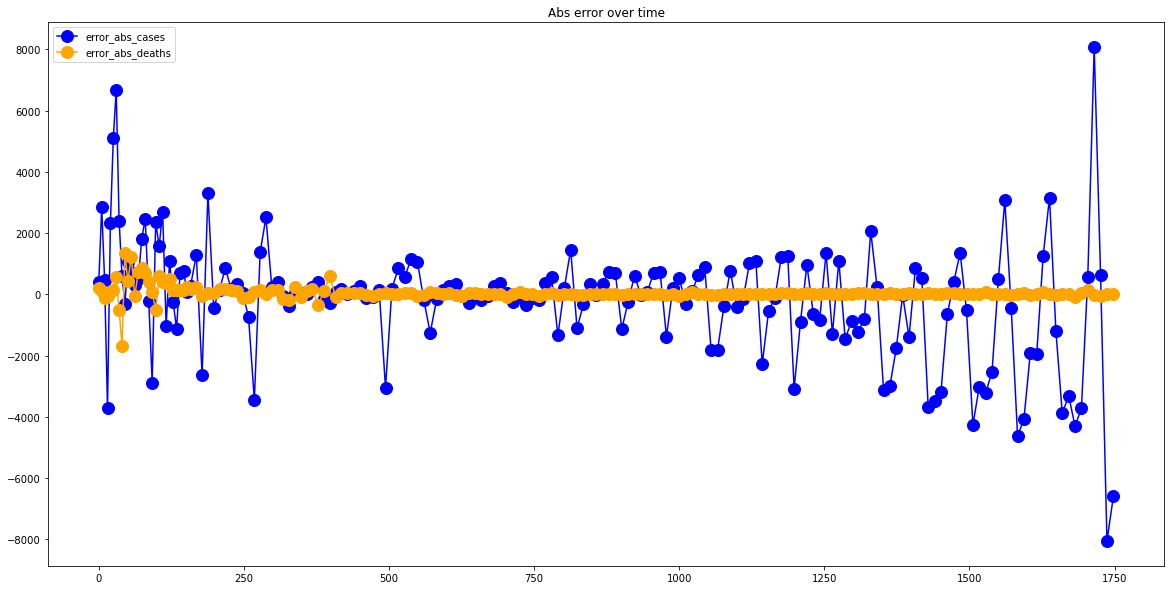

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.27272727272725
RMSE =  445.18003253025216
-- Italy performances for deaths --
MAE =  65.5
RMSE =  223.84455848565173


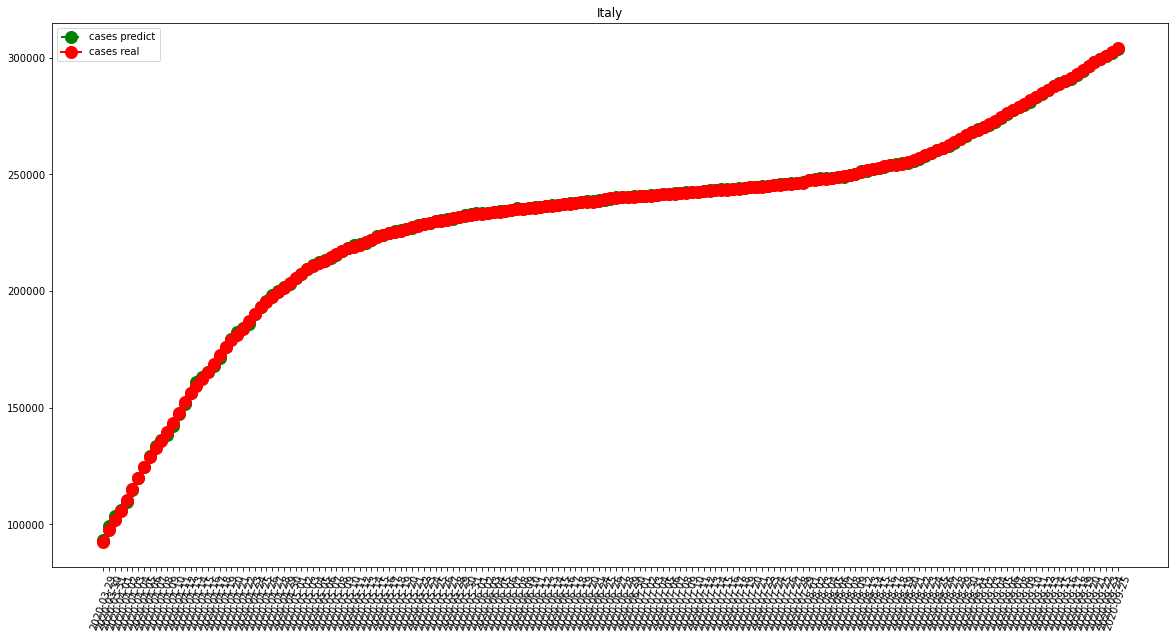

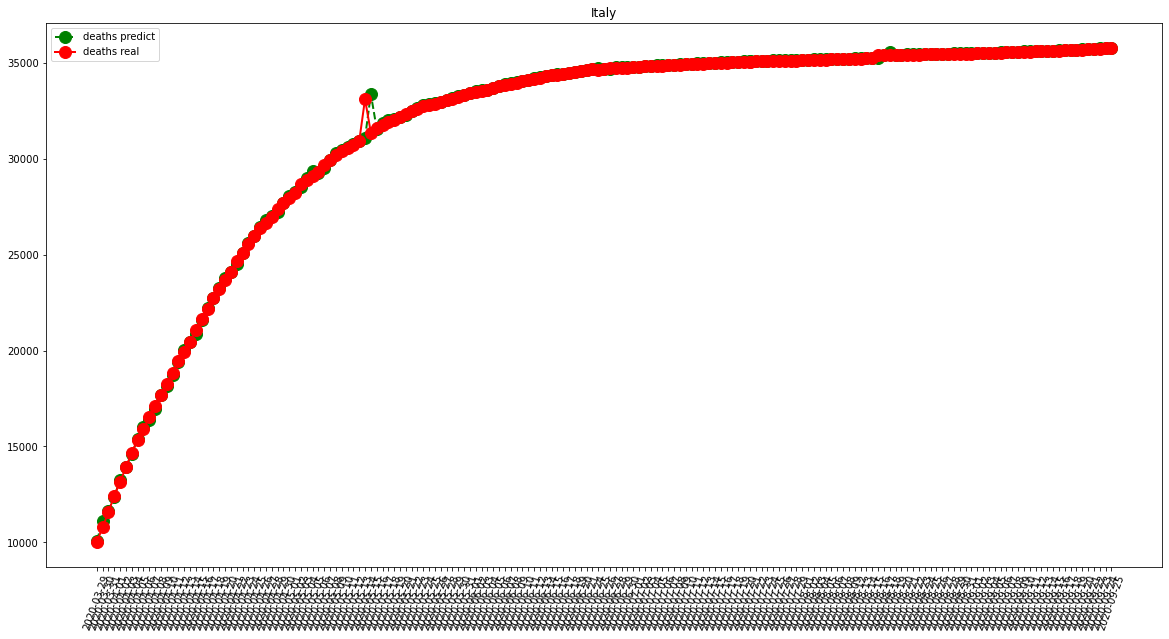

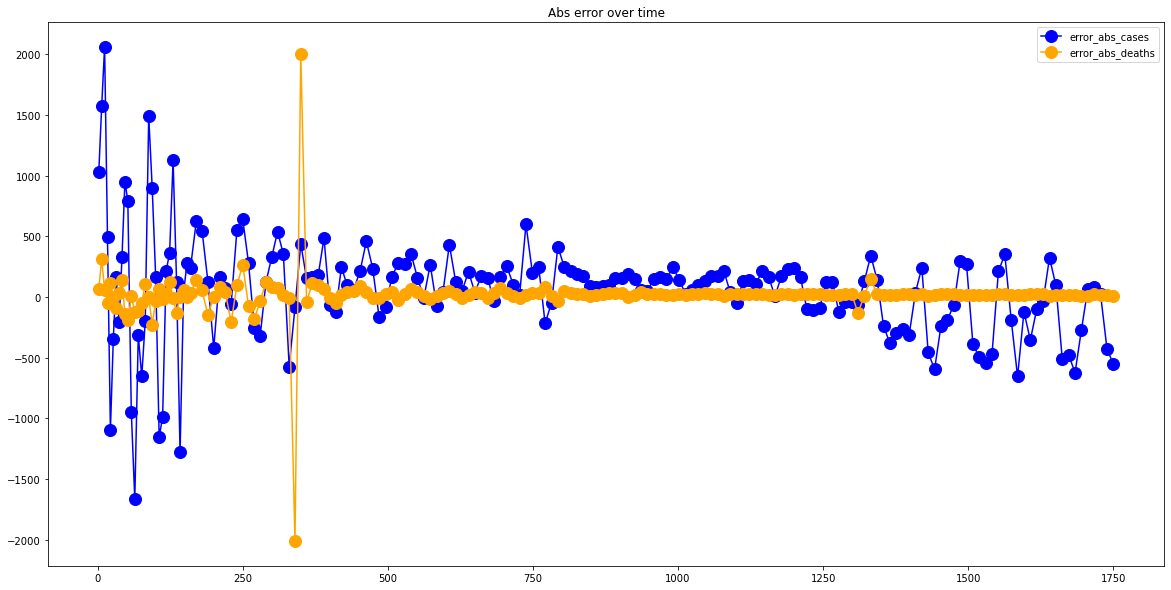

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2693.278409090909
RMSE =  5280.9024070659125
-- Spain performances for deaths --
MAE =  120.3465909090909
RMSE =  308.510635959281


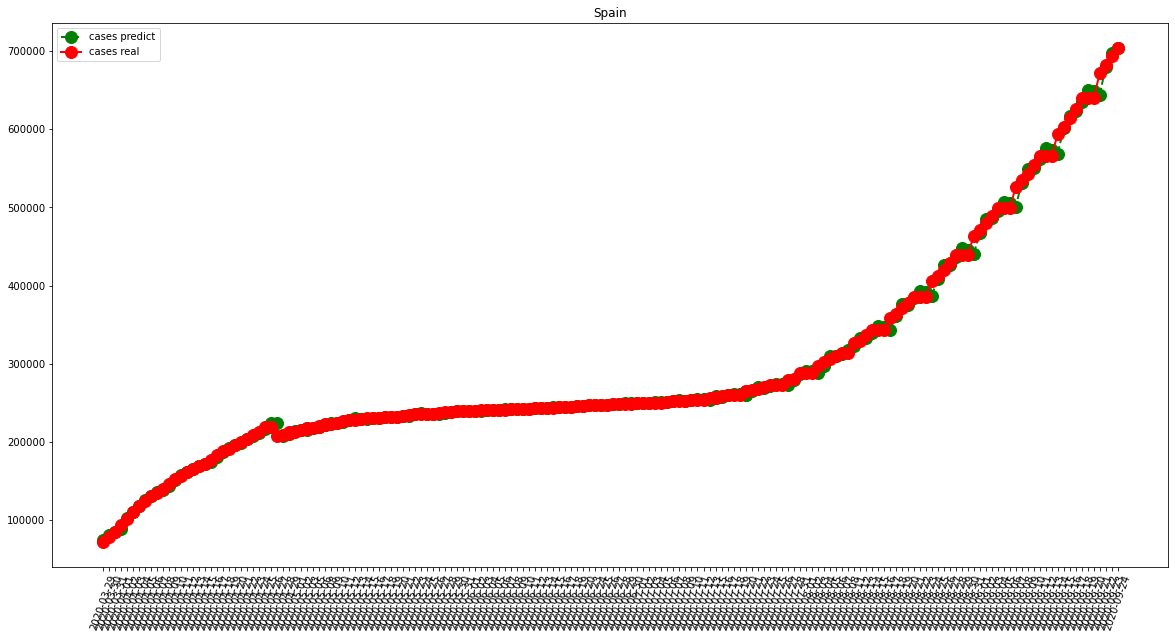

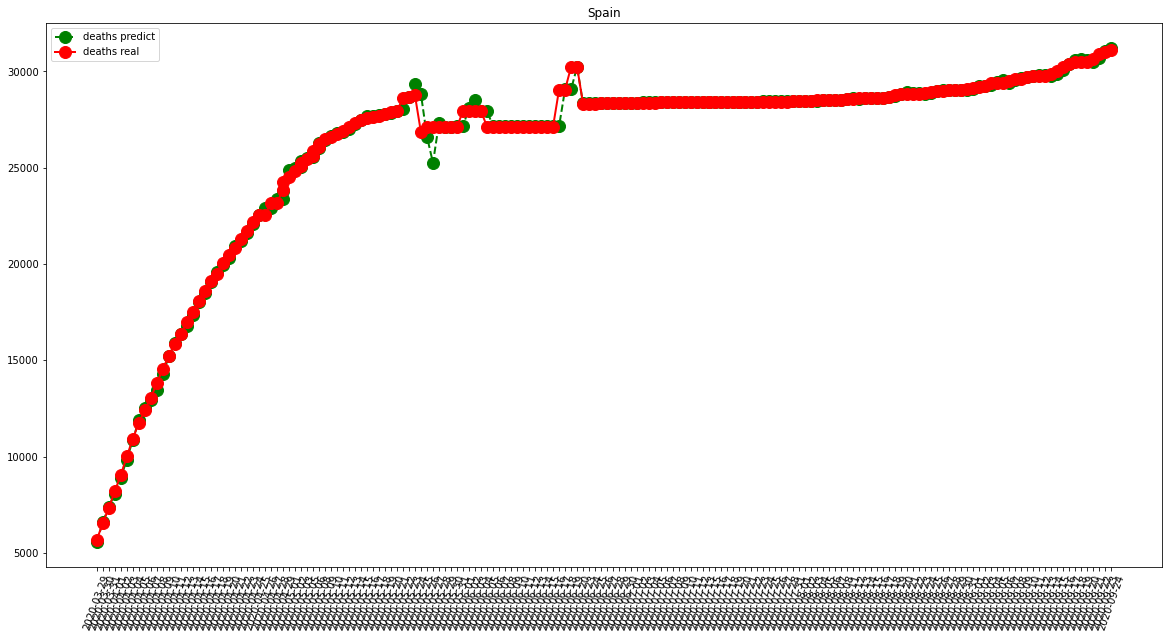

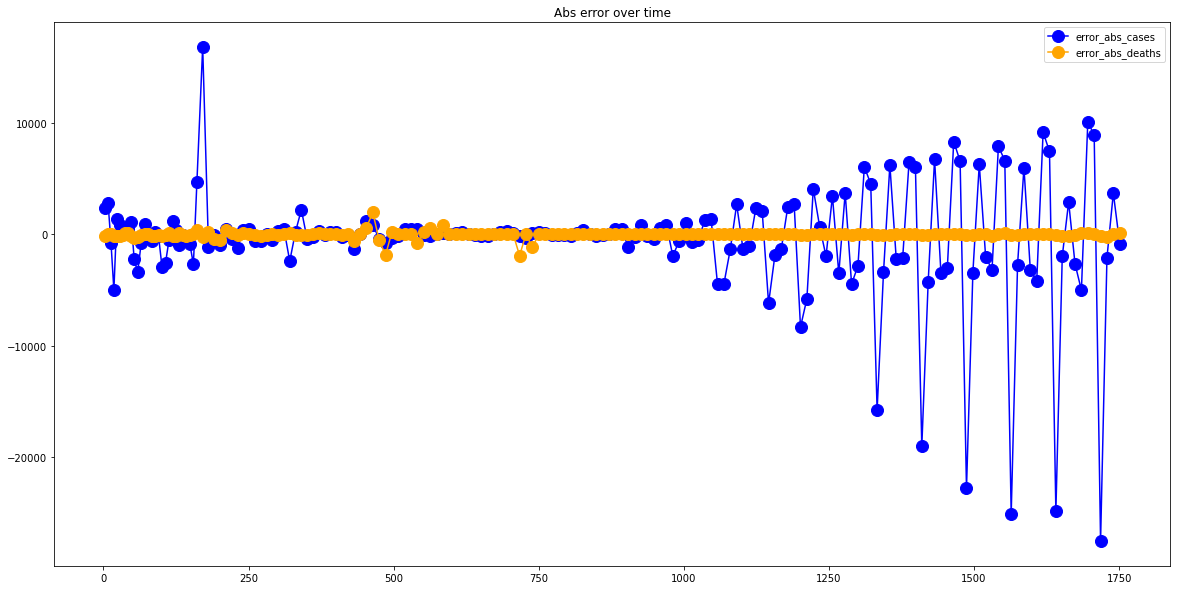

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15908.443181818182
RMSE =  23315.17694623163
-- United States performances for deaths --
MAE =  479.0568181818182
RMSE =  670.0300790398755


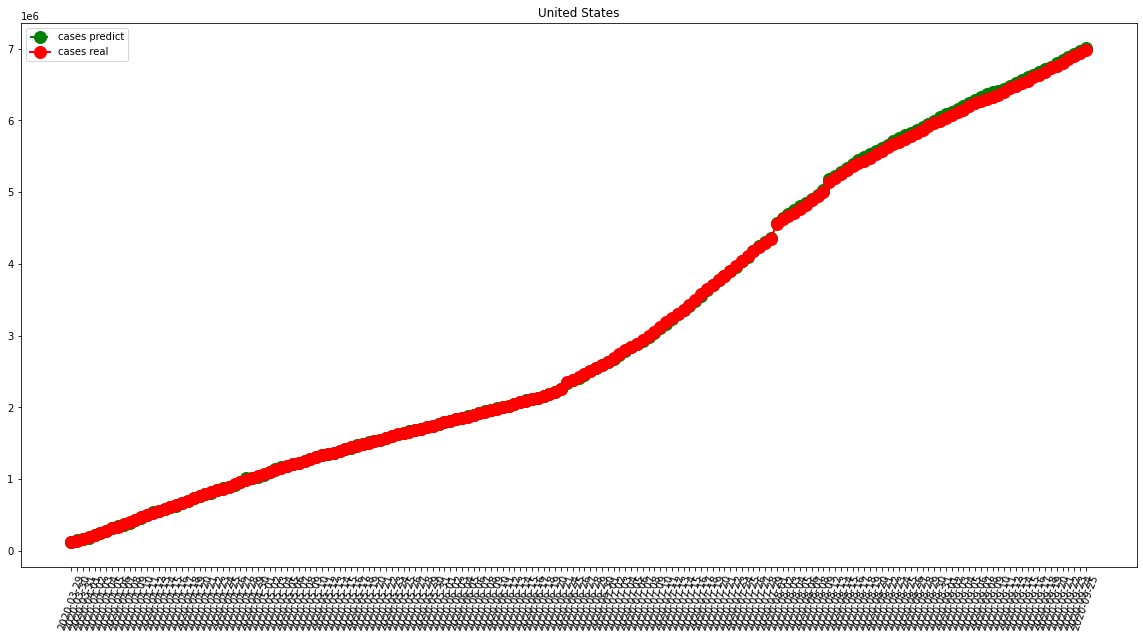

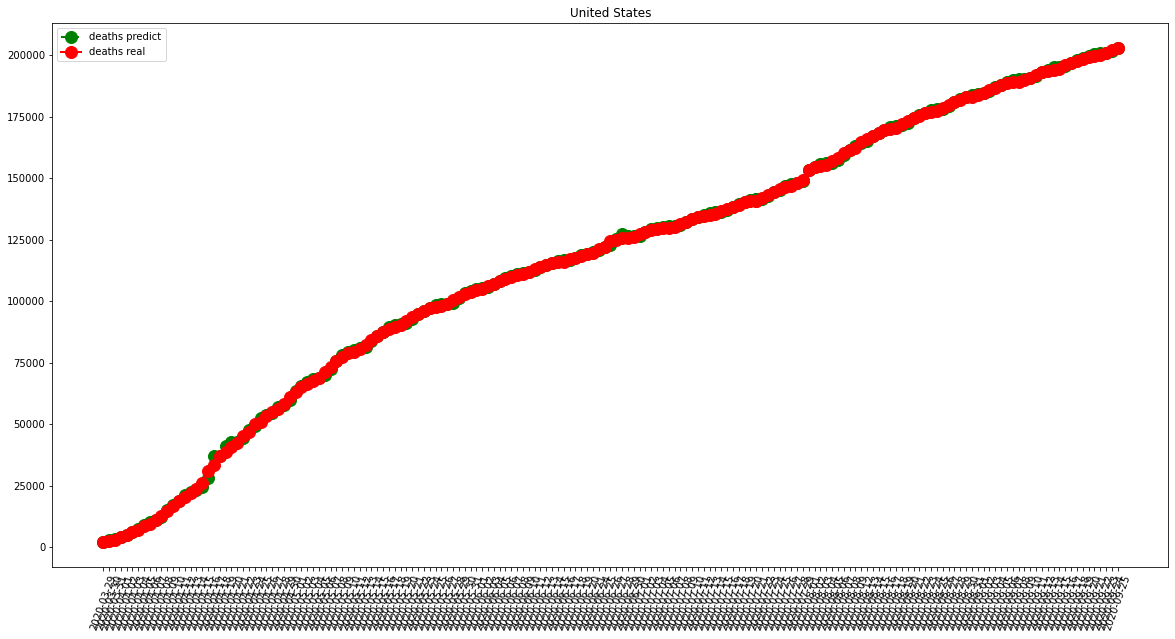

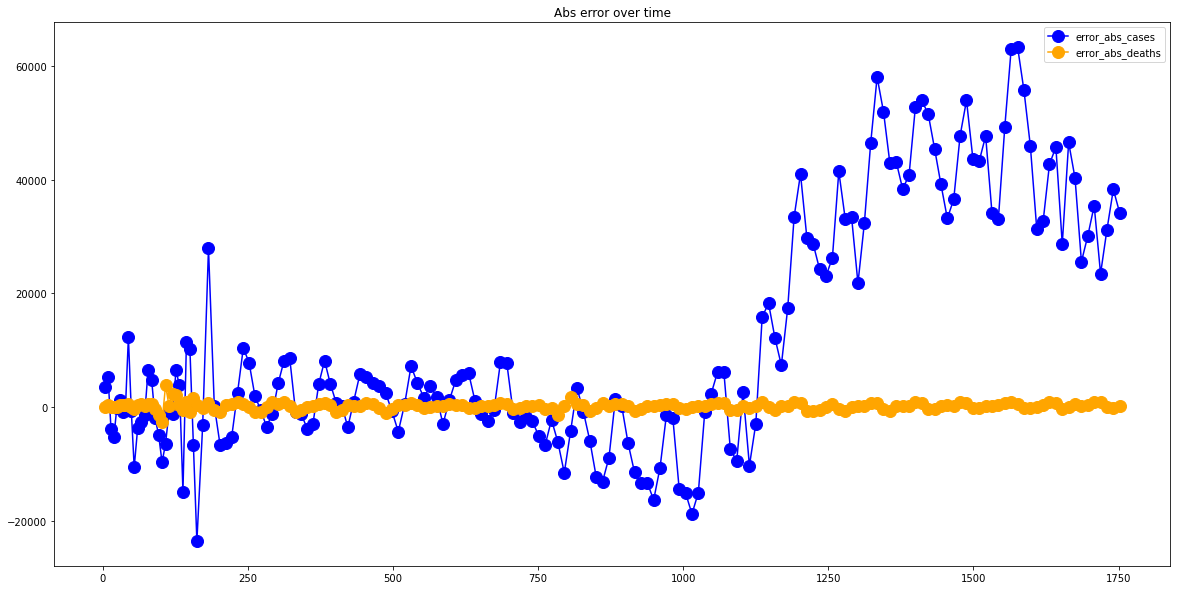

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  58.11931818181818
RMSE =  90.03203344062904
-- China performances for deaths --
MAE =  24.34659090909091
RMSE =  118.37534198856234


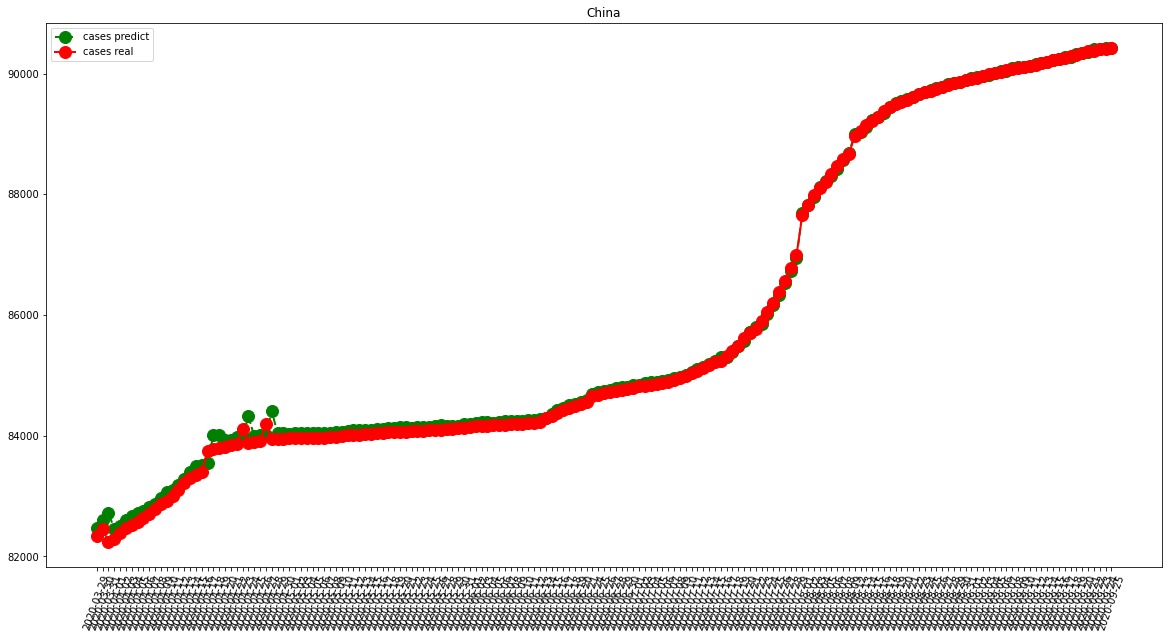

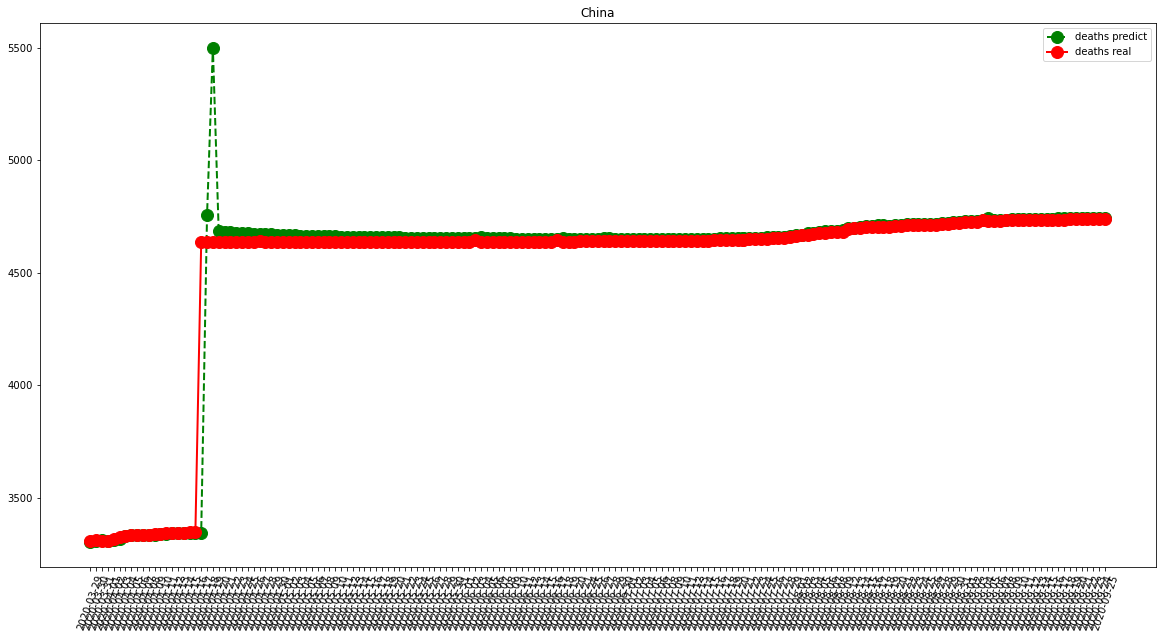

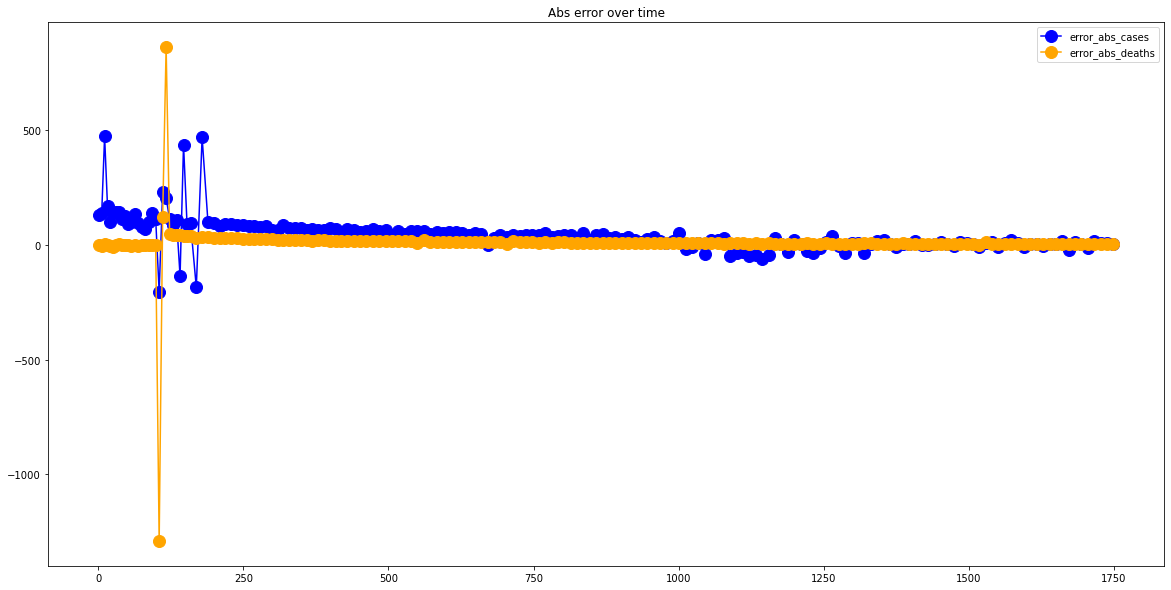

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1055.1351351351352
RMSE =  3478.5518305521678
-- United Kingdom performances for deaths --
MAE =  208.76351351351352
RMSE =  701.60287046009


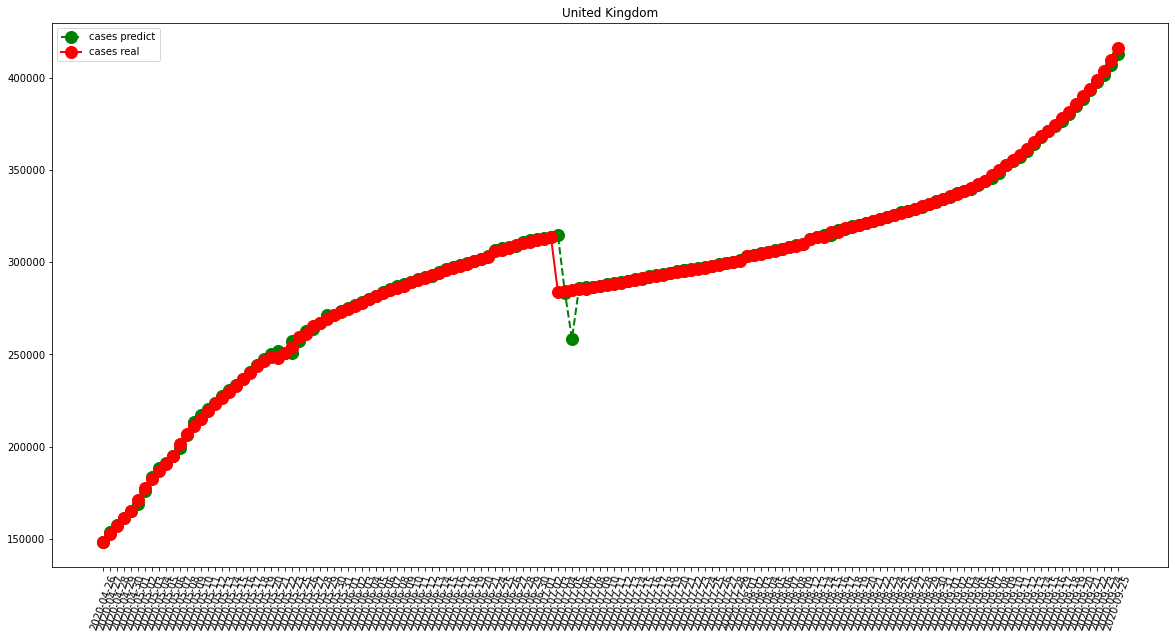

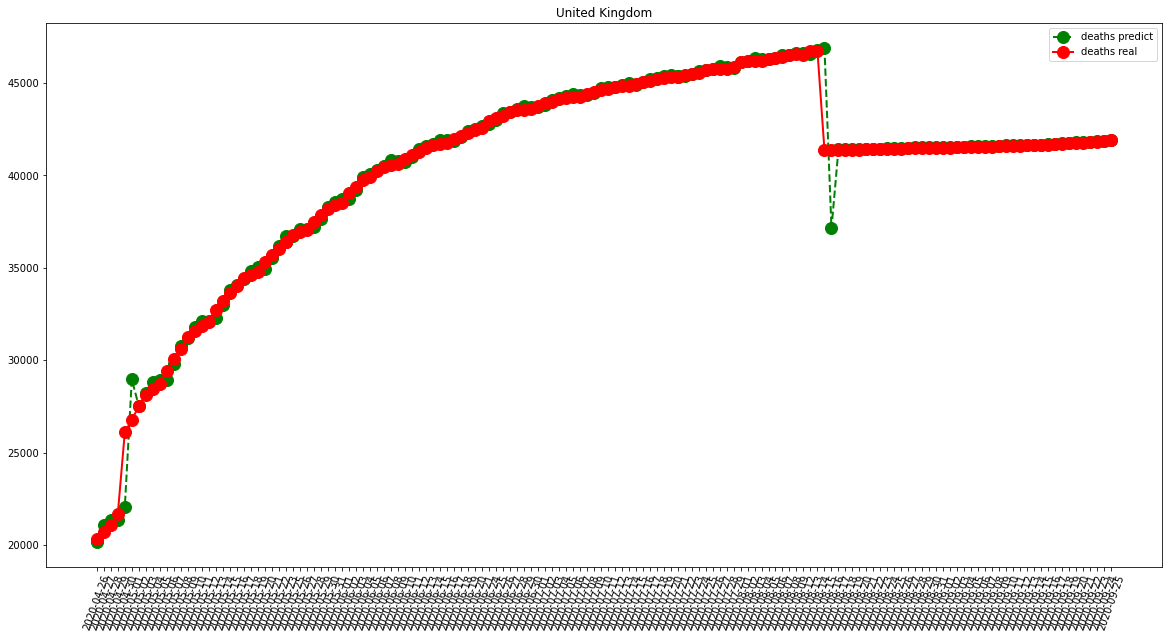

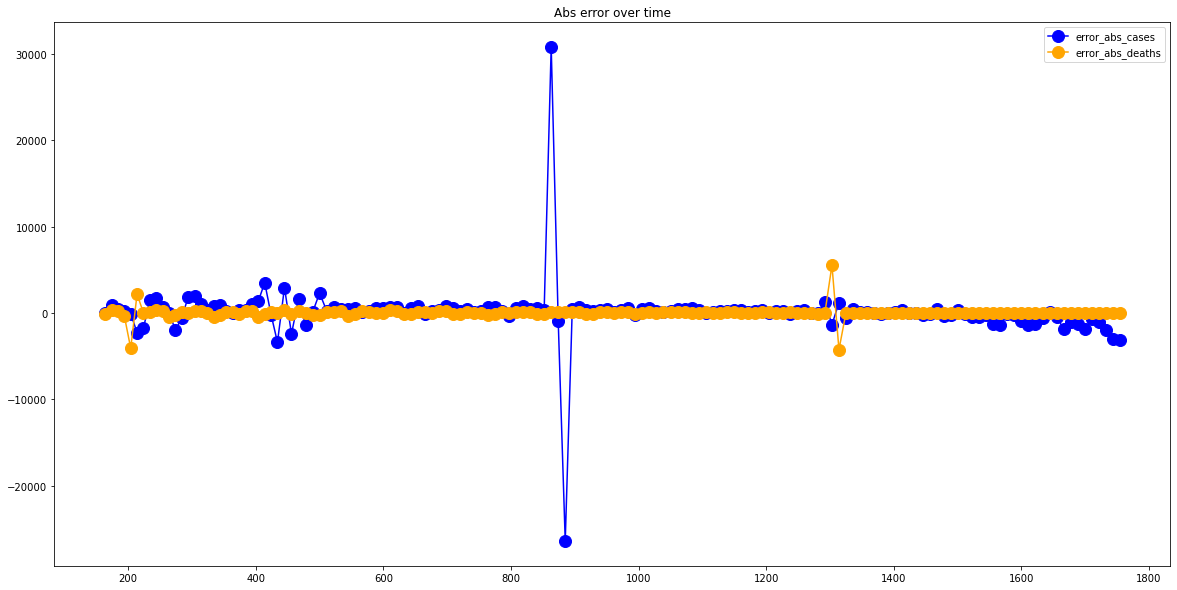

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  423.2432432432432
RMSE =  588.8714814130683
-- Germany performances for deaths --
MAE =  18.574324324324323
RMSE =  36.23991005895408


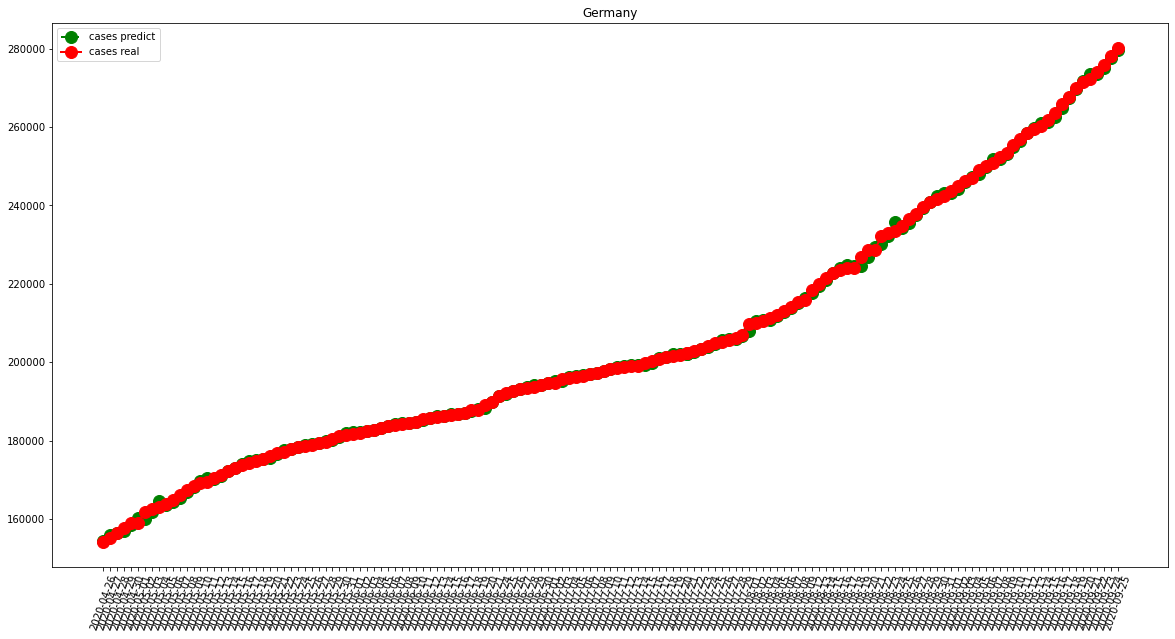

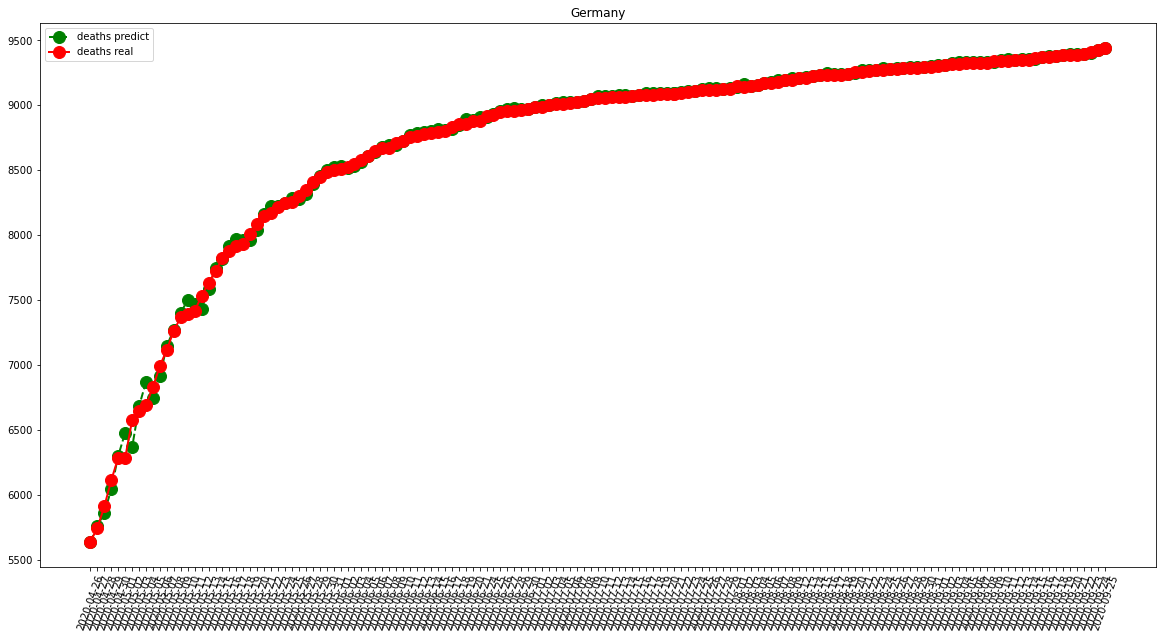

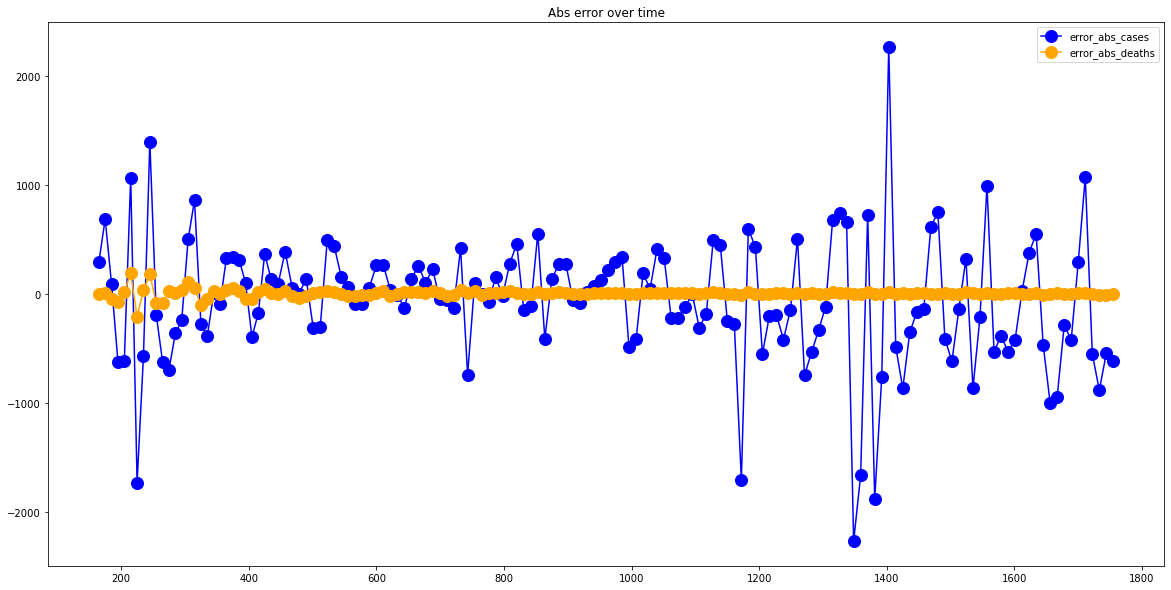

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  867.5067567567568
RMSE =  1218.8150786505498
-- Iran performances for deaths --
MAE =  51.32432432432432
RMSE =  84.3789713780087


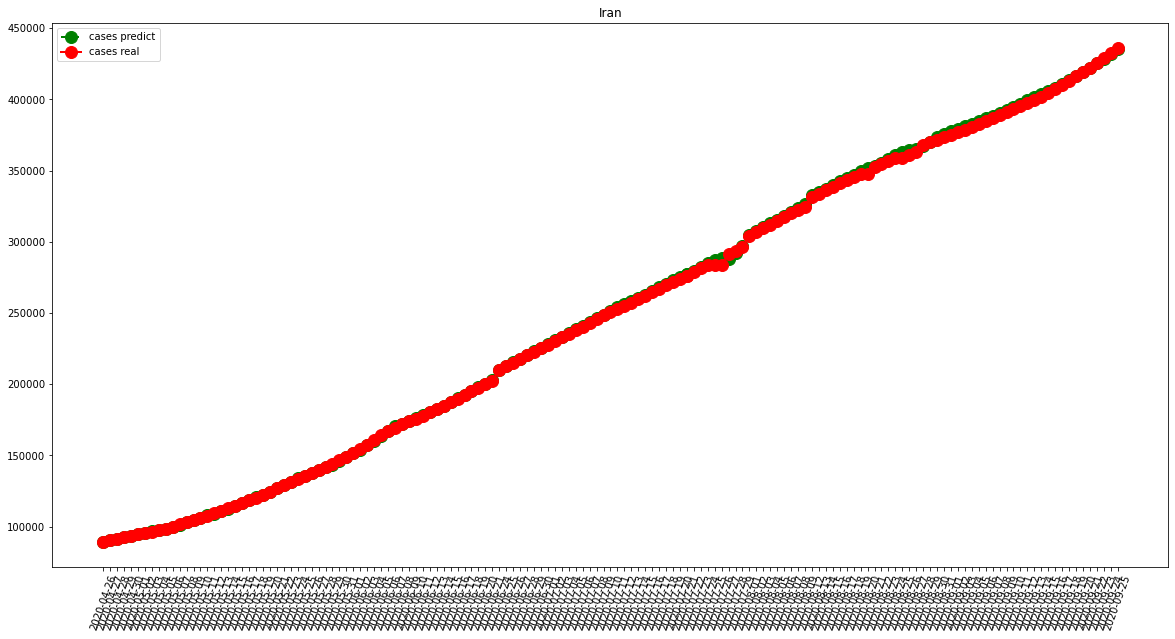

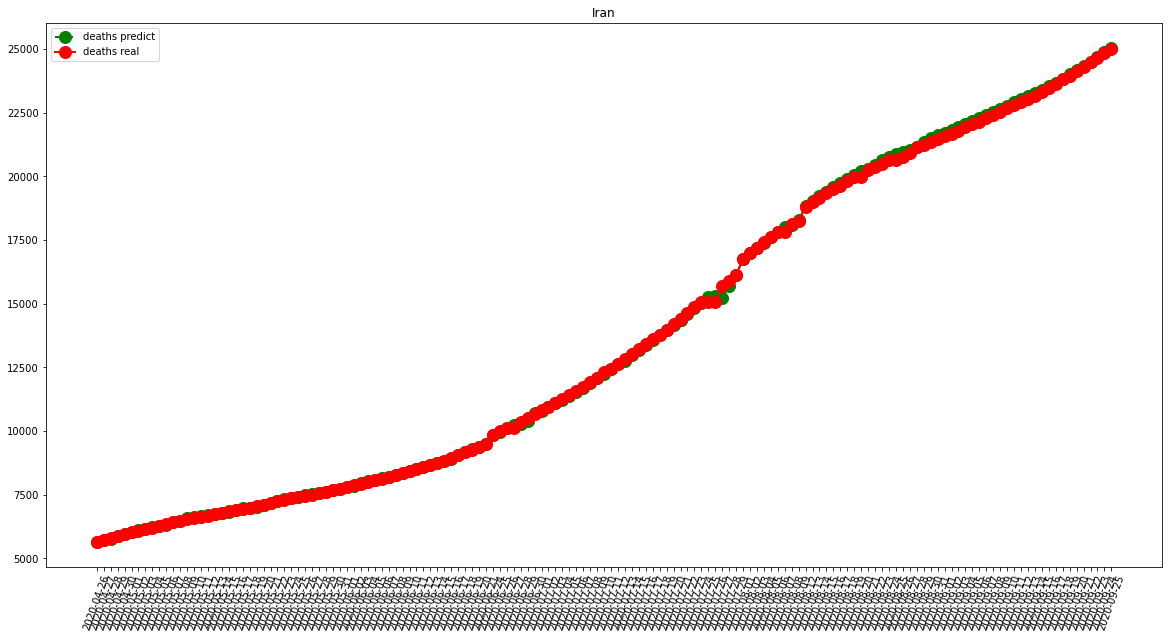

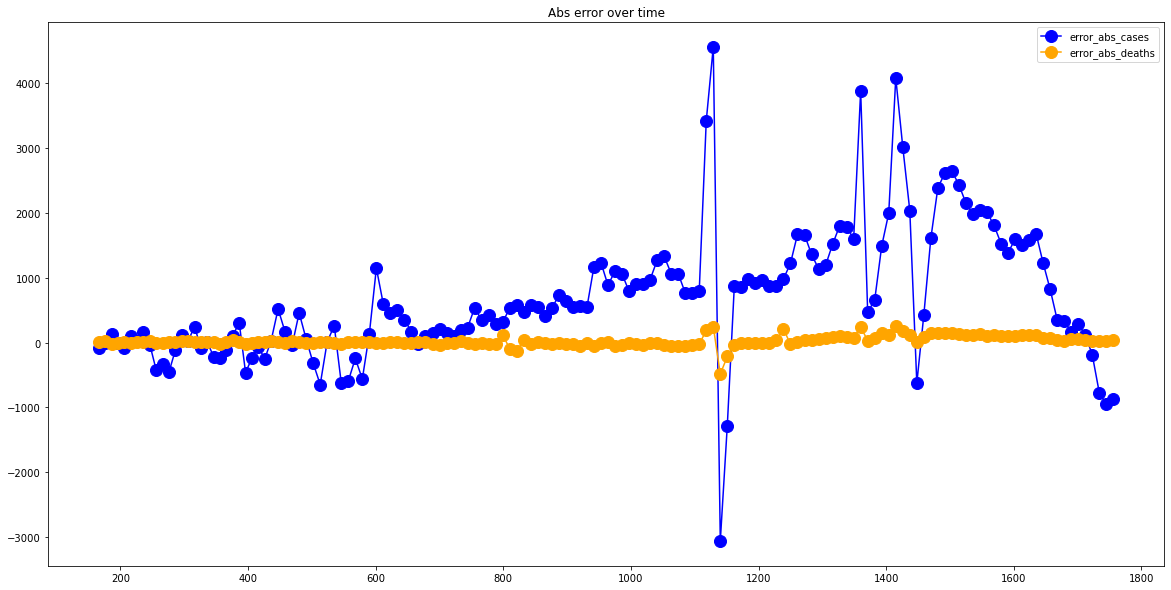

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.49324324324326
RMSE =  333.59549262947587
-- Turkey performances for deaths --
MAE =  15.91891891891892
RMSE =  83.70096386154314


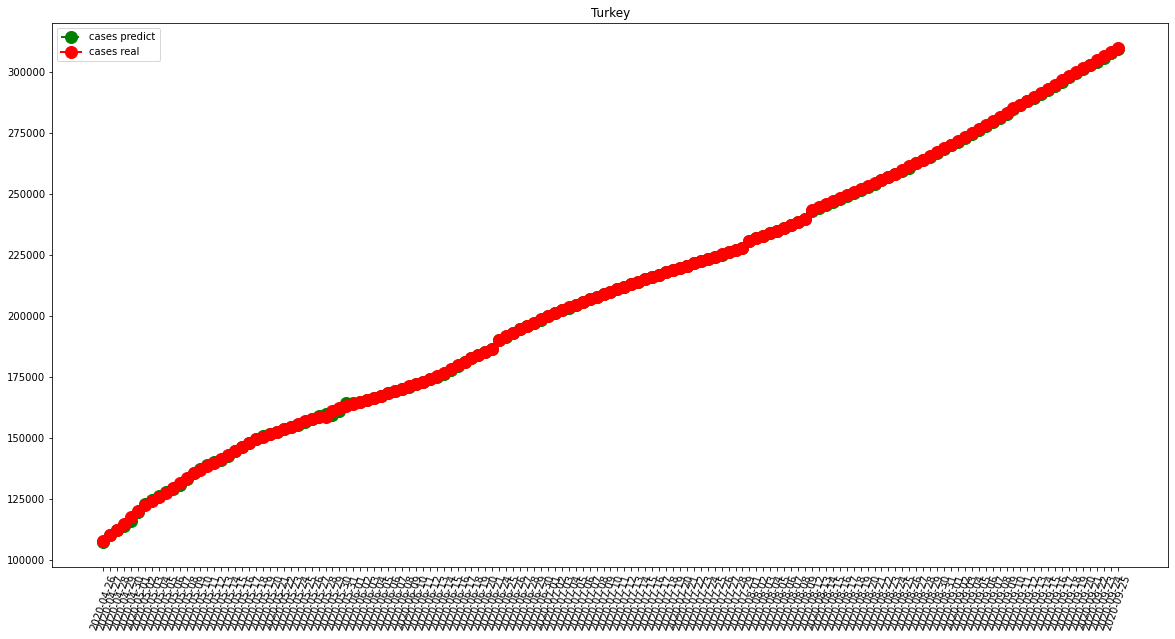

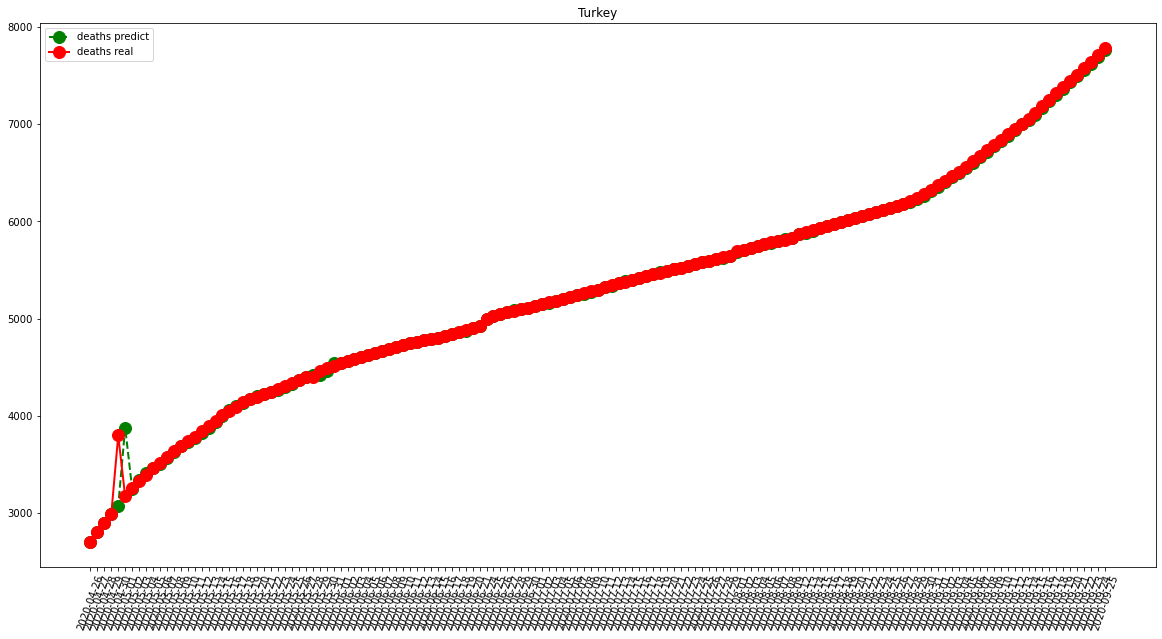

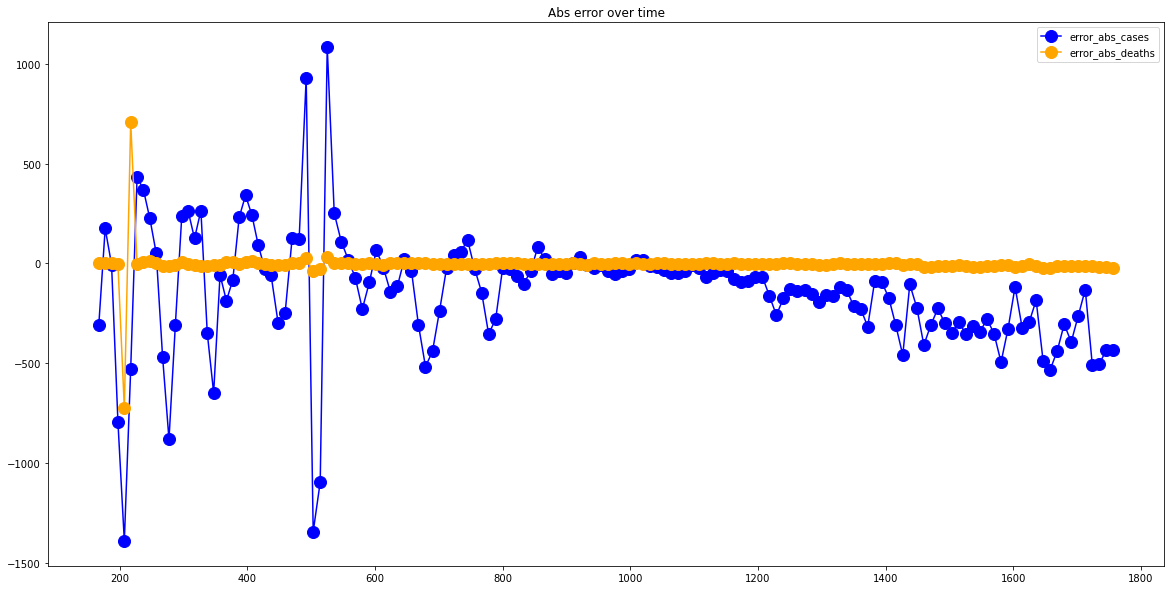

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16740.942148760332
RMSE =  21875.97206227466
-- Brazil performances for deaths --
MAE =  495.6363636363636
RMSE =  600.0192696630185


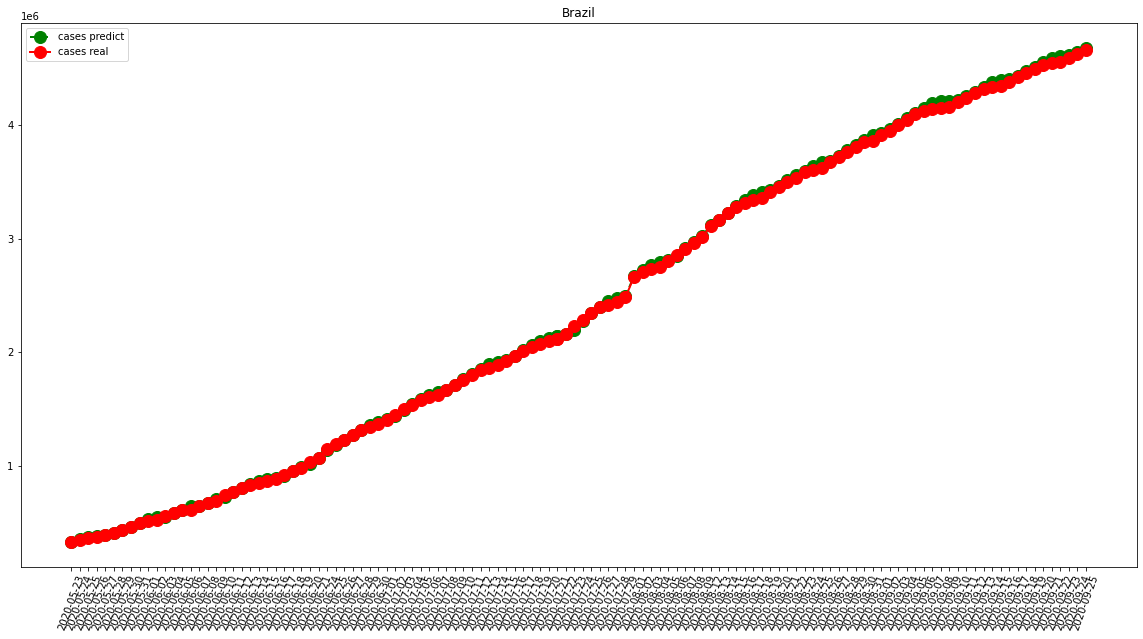

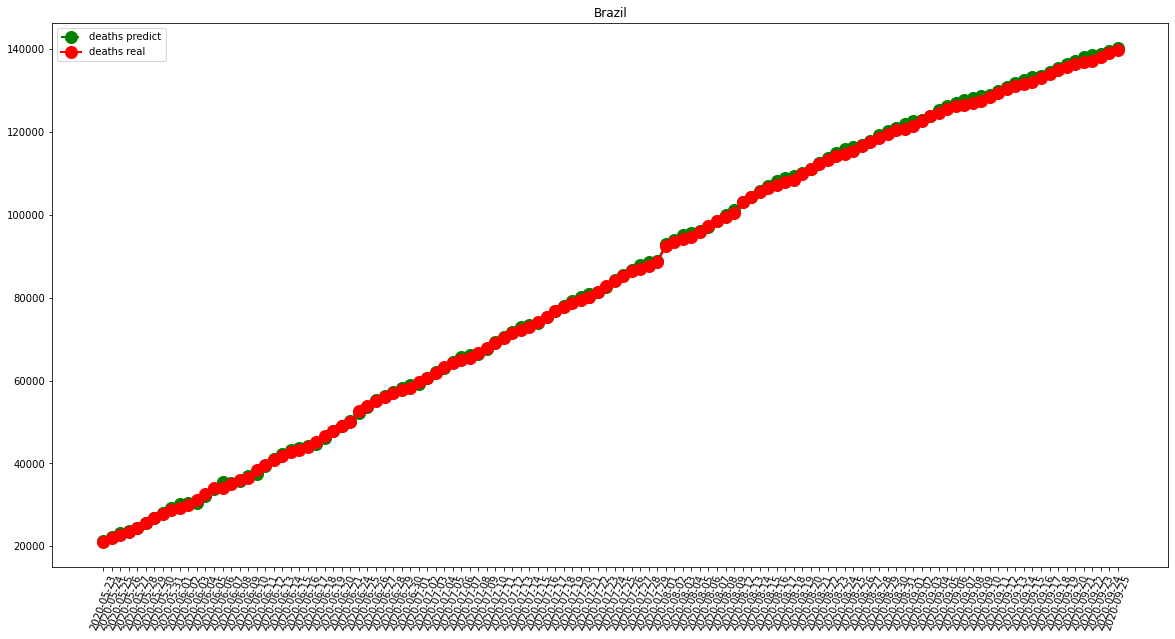

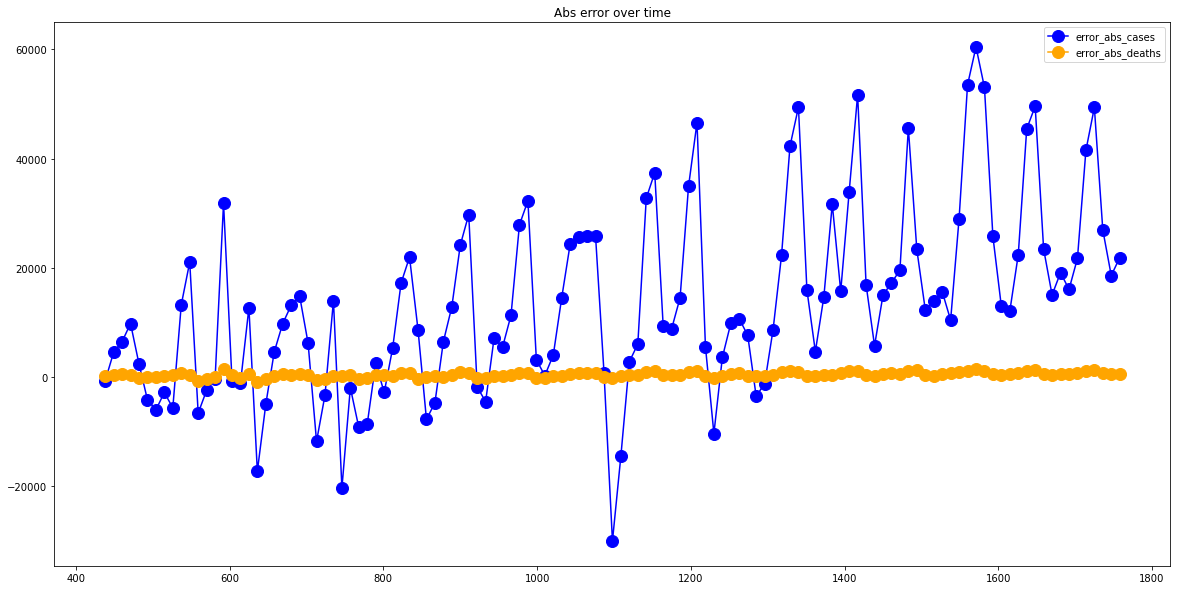

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)